In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ST_NAME
ST_NAME_SUF
ZIPCODE
LU
AV_TOTAL
YR_BUILT
LIVING_AREA


In [3]:
def clean_zip_code(zip_code):
    
    if type(zip_code) is float:
        zip_code = int(zip_code)
        zip_code = str(zip_code)
    elif type(zip_code) is str:
        zip_code.replace('_', '')
        zip_code.replace('0', '')
    
    return zip_code

def pre_process_data(housing_data_all_cols):    
    housing_data = housing_data_all_cols[['ST_NAME',
                                         'ST_NAME_SUF',
                                         'ZIPCODE',
                                         'LU',
                                         'AV_TOTAL',
                                         'YR_BUILT',
                                         'LIVING_AREA']]
    housing_data['ST_NAME'] = housing_data['ST_NAME'] + " " + housing_data['ST_NAME_SUF'] 
    housing_data = housing_data.drop(['ST_NAME_SUF'], axis=1)
    housing_data = housing_data.dropna(how='any')
    
    housing_data['ZIPCODE'] = housing_data.ZIPCODE.map(lambda x:clean_zip_code(x))
    
    indexNames = housing_data[ housing_data['AV_TOTAL'] == 0 ].index

    # Delete these row indexes from dataFrame
    housing_data.drop(indexNames , inplace=True)
    
    return housing_data

In [4]:
#2015 Property valuation data
fileURL = './housing_data_2015.csv'
housing_data_all_cols_2015 = pd.read_csv(fileURL, header=0)
housing_data_2015 = pre_process_data(housing_data_all_cols_2015)

#2016 Property valuation data
fileURL = './housing_data_2016.csv'
housing_data_all_cols_2016 = pd.read_csv(fileURL, header=0)
housing_data_2016 = pre_process_data(housing_data_all_cols_2016)

#2017 Property valuation data
fileURL = './housing_data_2017.csv'
housing_data_all_cols_2017 = pd.read_csv(fileURL, header=0)
housing_data_2017 = pre_process_data(housing_data_all_cols_2017)

#2018 Property valuation data
fileURL = './housing_data_2018.csv'
housing_data_all_cols_2018 = pd.read_csv(fileURL, header=0)
housing_data_2018 = pre_process_data(housing_data_all_cols_2018)

#2019 Property valuation data
fileURL = './housing_full_data.csv'
housing_data_all_cols = pd.read_csv(fileURL, header=0)
housing_data = pre_process_data(housing_data_all_cols)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on i

In [5]:
housing_data.head(100)

,ST_NAME,ZIPCODE,LU,AV_TOTAL,YR_BUILT,LIVING_AREA
0,BEACON ST,2108,CD,878200,1850.0,789.0
1,BEACON ST,2108,CD,817600,1850.0,752.0
2,BEACON ST,2108,CD,849500,1850.0,792.0
3,BEACON ST,2108,CD,734400,1850.0,720.0
4,BEACON ST,2108,CD,2162300,1850.0,1482.0
6,BEACON ST,2108,CD,438200,1900.0,468.0
7,BEACON ST,2108,CD,739400,1900.0,772.0
8,BEACON ST,2108,CD,7683300,1900.0,3857.0
9,BEACON ST,2108,CD,623600,1900.0,494.0
10,BEACON ST,2108,CD,1415500,1900.0,1045.0


In [6]:
housing_data_2015.tail(100)

,ST_NAME,ZIPCODE,LU,AV_TOTAL,YR_BUILT,LIVING_AREA
168008,SAVIN HILL AV,02125_,R2,403900,1895.0,3120.0
168009,SAVIN HILL AV,02125_,R2,476500,1920.0,2934.0
168010,SAVIN HILL AV,02125_,R2,437500,1910.0,2976.0
168011,SAVIN HILL AV,02125_,R3,468600,1905.0,2997.0
168012,SAVIN HILL AV,02125_,CD,272300,1905.0,1251.0
168013,SAVIN HILL AV,02125_,CD,272300,1905.0,1251.0
168014,SAVIN HILL AV,02125_,CD,267100,1905.0,1192.0
168015,SAVIN HILL AV,02125_,CD,267100,1905.0,1192.0
168016,SAVIN HILL AV,02125_,CD,207300,1905.0,1140.0
168018,SAVIN HILL AV,02125_,CD,271400,1899.0,1409.0


In [7]:
zipcode_grpby_2019 = pd.DataFrame(housing_data.groupby(['ZIPCODE']).mean()['AV_TOTAL'])

In [8]:
zipcode_grpby_2019

,AV_TOTAL
ZIPCODE,
2026,5.101000e+05
2090,7.245000e+05
2108,3.075567e+06
2109,4.142571e+06
2110,6.387228e+06
2111,3.525332e+06
2112,4.910000e+04
2113,1.233857e+06
2114,1.112201e+07


In [9]:
#2018 Property valuation data
fileURL = './crime_data_zip.csv'
crime_data = pd.read_csv(fileURL, header=0)

In [21]:
crime_data_part_one_2018 = crime_data[(crime_data.UCR_PART == 'Part One') & (crime_data.YEAR == 2018)]
crime_data_zip_code_2018 = pd.DataFrame(crime_data_part_one_2018.groupby('ZIP').count()['INCIDENT_NUMBER'])

In [101]:
zipcode_grpby_2018 = pd.DataFrame(housing_data_2018.groupby(['ZIPCODE']).mean()['AV_TOTAL'])
zipcode_grpby_2018.index.names = ['ZIP']
zipcode_grpby_2018

,AV_TOTAL
ZIP,
2090,7.245000e+05
2108,2.945390e+06
2109,3.972033e+06
2110,6.133228e+06
2111,3.426889e+06
2112,4.660000e+04
2113,1.181246e+06
2114,1.160151e+07
2115,1.589667e+07


In [104]:
crime_data_zip_code_2018 = crime_data_zip_code_2018.reset_index()
zipcode_grpby_2018 = zipcode_grpby_2018.reset_index()

In [102]:
zipcode_grpby_2018.ZIP.map(lambda x:int(x))

Int64Index([2090, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2118,
            2119, 2120, 2121, 2122, 2124, 2125, 2126, 2127, 2128, 2129, 2130,
            2131, 2132, 2133, 2134, 2135, 2136, 2137, 2186, 2199, 2201, 2210,
            2215, 2445, 2446, 2467],
           dtype='int64', name='ZIP')

In [103]:
crime_data_zip_code_2018.ZIP.map(lambda x:int(x))

Int64Index([1125, 2026, 2102, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115,
            2116, 2118, 2119, 2120, 2121, 2122, 2124, 2125, 2126, 2127, 2128,
            2129, 2130, 2131, 2132, 2134, 2135, 2136, 2141, 2151, 2152, 2163,
            2171, 2186, 2199, 2205, 2210, 2215, 2228, 2284, 2445, 2446, 2458,
            2467, 2472],
           dtype='int64', name='ZIP')

In [112]:
zipcode_grpby_2018.ZIP = zipcode_grpby_2018.ZIP.map(lambda x:int(x))

In [115]:
merged = crime_data_zip_code_2018.merge(zipcode_grpby_2018, how='inner', on='ZIP')

In [116]:
merged.head()

,ZIP,INCIDENT_NUMBER,AV_TOTAL
0,2108,269,2.945390e+06
1,2109,370,3.972033e+06
2,2110,325,6.133228e+06
3,2111,196,3.426889e+06
4,2112,302,4.660000e+04


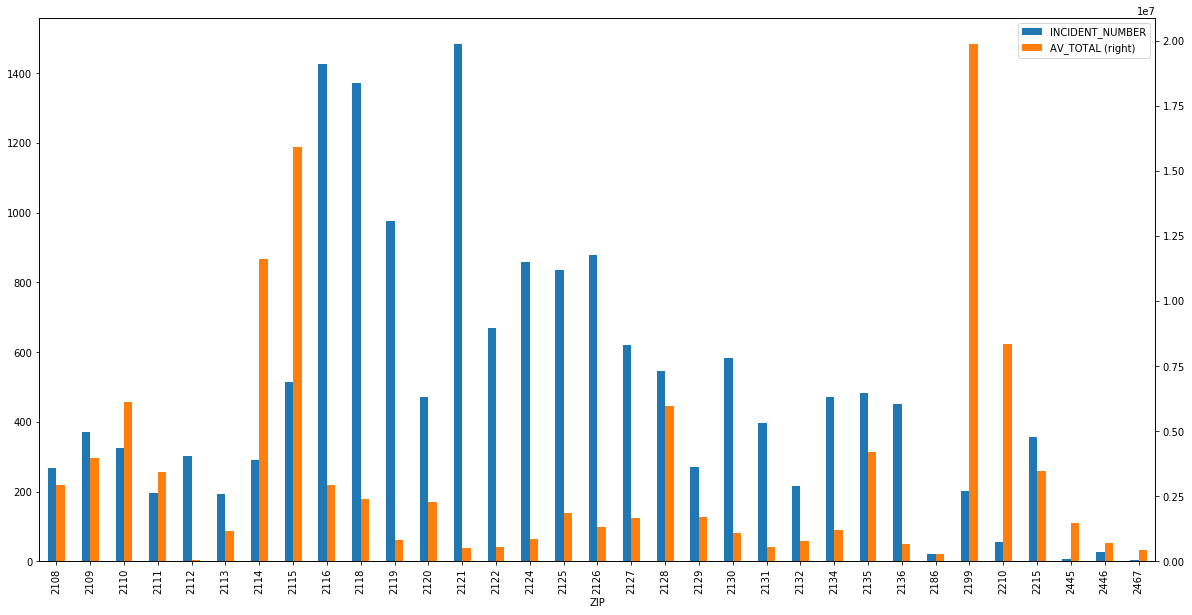

In [136]:
merged.plot(kind='bar', x='ZIP', secondary_y='AV_TOTAL', figsize=(20, 10))